# Analiza Podatkov

## Uvod

Najprej s pomočjo knjižnice pandas predstavimo vse potrebne csv datoteke. **about.csv** vsebuje tehnične podatke najboljših 500 knjig, iz datoteke **genre.csv** pa bomo lahko prebrali kateri žanri knjig so najpopularnejši. Datoteka **glavno.csv** vsebuje glavne podatke o knjigah.

In [31]:
import pandas as pd
%matplotlib inline
knjige = pd.read_csv('C:/Users/domin/Desktop/PN prog1/obdelani-podatki/knj.csv')

genre = pd.read_csv('C:/Users/domin/Desktop/PN prog1/obdelani-podatki/genre.csv')


splosno = pd.read_csv('C:/Users/domin/Desktop/PN prog1/obdelani-podatki/about.csv')

# Predstavimo posamezne tabele
Za boljšo preglednost bomo najprej predstavili vse tabele, ki jih bomo uporabljali pri analizi podatkov.

In [32]:
knjige

,naslov,autorID,autor,ocena,glasovi
0,The Hunger Games,153394,Suzanne Collins,4.33,"6,393,487"
1,Harry Potter and the Order of the Phoenix,1077326,J.K. Rowling,4.50,"2,516,497"
2,To Kill a Mockingbird,1825,Harper Lee,4.28,"4,514,533"
3,Pride and Prejudice,1265,Jane Austen,4.26,"3,008,275"
4,Twilight,941441,Stephenie Meyer,3.60,"4,977,934"
...,...,...,...,...,...
9911,Bonus Keefe Story,5265998,Shannon Messenger,4.62,991
9912,Tales from a Not-So-Graceful Ice Princess (Dor...,2766469,Rachel Renée Russell,4.35,"22,820"
9913,"O Jerusalem (Mary Russell and Sherlock Holmes,...",6760,Laurie R. King,4.14,"16,615"
9914,Broken April,10838,Ismail Kadare,4.01,"4,031"


genre

In [33]:
genre

,genre,genre_glasovi
0,Young Adult,"30,731"
1,Fiction,"17,227"
2,Fantasy,"13,448"
3,Science Fiction,"10,550"
4,Romance,"3,907"
...,...,...
653,Contemporary,368
654,Literature,353
655,Literary Fiction,284
656,Novels,280


In [34]:
splosno

,naslov,izdano,dolzina,jezik
0,The Hunger Games,2008,374,English
1,Harry Potter and the Order of the Phoenix,2004,870,English
2,To Kill a Mockingbird,2006,324,English
3,Pride and Prejudice,2000,279,English
4,Twilight,2006,501,English
...,...,...,...,...
481,Demian: Die Geschichte von Emil Sinclairs Jugend,1996,194,German
482,Aristotle and Dante Discover the Secrets of th...,2012,359,English
483,The 5th Wave,2013,457,English
484,The Iron King,2010,363,English


# Najpopularnejši žanri
Najprej analizirajmo žanre. Zavedati se moramo, da lahko ena knjiga spada pod več žanrov, zato je zaradi enostavnosti popularnost knjige ocenjena glede na žanr, ki ga predlaga uporabnik oziroma bralec knjige. Vsak bralec lahko glasuje, v kateri žanr uvršča knjigo. Pogledali si bomo, kateri žanri so dobili največ glasov.

In [35]:

def zdruzi_glasove(seznam):
    zanri = {}
    for i in range(0,658):
        if seznam.at[i, 'genre'] not in zanri:
            count = int((seznam.at[i, 'genre_glasovi']).replace(",",""))
            for j in range(i + 1, 658):
                if seznam.at[i, 'genre'] == seznam.at[j, 'genre']:
                    count += int((seznam.at[j, 'genre_glasovi']).replace(",",""))
            zanri[seznam.at[i, 'genre']] = count
    return zanri

dict(sorted(zdruzi_glasove(genre).items(), key=lambda item: item[1]))
my_dict = zdruzi_glasove(genre)
sortitan = dict(sorted(my_dict.items(), key=lambda item: item[1], reverse=True))
df = pd.DataFrame(list(sortitan.items()),columns = ['žanri','število glasov'])
print(df.head(6))



             žanri  število glasov
0         Classics          993635
1          Fiction          844599
2          Fantasy          531756
3      Young Adult          283772
4  Science Fiction          123282
5          Romance          108318


S tem smo prišli do odgovora na prvo vprašanje.

Opazimo lahko, da najpopularnejše knjige spadajo pod klasike. Med njimi lahko najdemo: "Prevzetnost in pristranost", "Živalska farma","1984" ...  Za njimi so fikcijske in fantazijske knjige. Sledijo jim še knjige za mlade odrasle, znanstveno fantastične knjige ter romantične knjige. 

# Analiza avtorjev

Naše naslednje vprašanje je, kateri avtor je napisal največ uspešnic. Najprej bomo raziskali vse knjige, ki jih imamo na voljo. Nato bomo analizirali še najboljših sto knjig. 


In [19]:
knjige.drop(columns=['glasovi','ocena', 'autorID']).groupby('autor').count().sort_values('naslov', ascending=False).head()


,naslov
autor,
Stephen King,62
Terry Pratchett,43
James Patterson,36
Rick Riordan,32
Meg Cabot,30


Največ uspešnic je napisal avtor Stephen King s 62 knjigami. Sledijo mu Terry Pratchett, James Patterson, Rick Riordan in Meg Cabot.

Poglejmo še, kakšne rezultate dobimo z analizo najbolj uspešnih 100 knjig. Ali so podobni?

In [20]:
knjige.head(100).drop(columns=['glasovi','ocena', 'autorID']).groupby('autor').count().sort_values('naslov', ascending=False).head(7)

,naslov
autor,
J.K. Rowling,4
George Orwell,2
Khaled Hosseini,2
J.R.R. Tolkien,2
Fyodor Dostoyevsky,2
Charles Dickens,2
A.A. Milne,1


Zanimivo je, da so rezultati popolnoma drugačni. Nobenega izmed avtorjev iz prve tabele ni v novi tabeli, kjer smo analizirali najbolj uspešnih 100 knjig. Avtorica z največ uspešnicami je tokrat J.K Rowling. 

Prišli smo do ugotovitve, da na zgornje vprašanje težko odgovorimo. Odgovor je odvisen od števila knjig, ki jih uporabljamo za analizo. Če gledamo najboljših 10.000 knjig, je najuspešnejši avtor Stephan King. Če pa pogledamo le prvih 100 knjig, je najuspešnejša avtorica J.K. Rowling.

Posledica različnosti rezultatov bi lahko bila razlika med kvaliteto in kvantiteto. Stephen King je napisal veliko knjig, medtem ko jih je J.K.Rowling napisala manj, vendar so te (po mnenju bralcev) boljše.

# Strogost ocen knjig

Zanima nas, če ocene knjig ponazarjajo Gaussovo krivuljo. Zaradi subjektivnosti ocenjevanja lahko pričakujemo, da bodo ocene morda malo nadpovprečne.

<AxesSubplot:title={'center':'Ocene knjig'}, xlabel='ocena'>

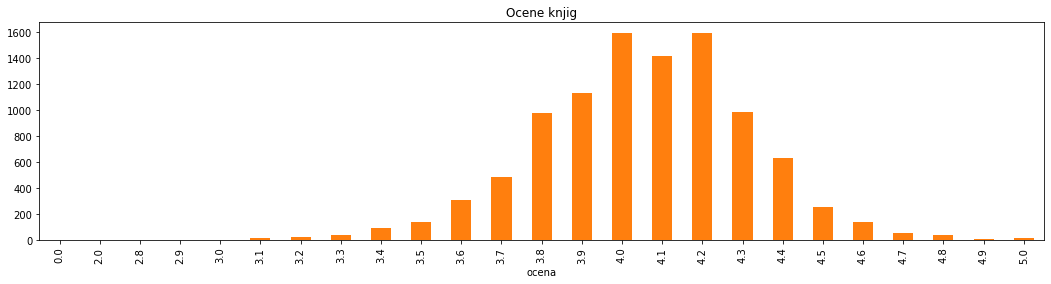

In [21]:

#zaokrožimo ocene za boljši pregled grafa
knjige['ocena'] = knjige['ocena'].round(decimals = 1)

knjige.groupby('ocena').size().plot.bar(color='C1', title='Ocene knjig', figsize=(18, 4))

Ker gledamo le ocene najbolje ocenjenih knjig je pričakovano, da najnižjih ocen ne vidimo. Vseeno pa lahko opazimo nekoliko "premakaknjeno" Gaussovo krivuljo. Le redko najdemo knjige z ocenami 3.0 ali 5.0, večina jih ima oceno 4.2. 

Nadalje se lahko še vprašamo, ali več glasov zberejo boljše ali slabše ocenjene knjige. Pričakujemo, da bodo več glasov zbrale bolje ocenjene knjige, saj so te popularnejše in posledično tudi predlagane več bralcem.

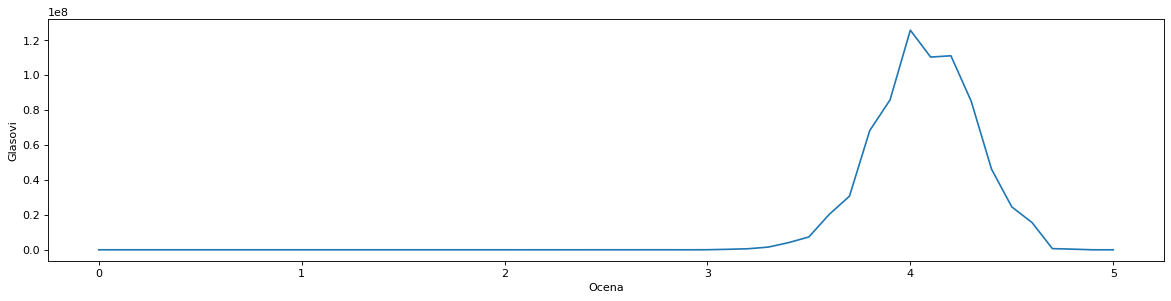

In [22]:
#Spremenimo glasovi iz str v int
knjige['glasovi'] = knjige['glasovi'].str.replace(',','')
knjige['ocena'] = knjige['ocena'].round(decimals = 1)
#print(knjige.drop(columns=['autor', 'autorID']))

my_dict = {}
for i in range(0, 9915):
    if knjige.at[i, 'ocena'] not in my_dict:
        count = int(knjige.at[i, 'glasovi'])
        for j in range(i + 1, 9915):
            if knjige.at[i, 'ocena'] == knjige.at[j, 'ocena']:
                count += int(knjige.at[j, 'glasovi'])
        my_dict[knjige.at[i, 'ocena']] = count    
  
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

figure(figsize=(18, 4), dpi=80)

myList = my_dict.items()
myList = sorted(myList)
x, y = zip(*myList)

plt.plot(x, y)
plt.xlabel('Ocena')
plt.ylabel('Glasovi')
plt.show()



Odgovor na postavljeno vprašanje torej ni v skladu s pričakovanji. Največ glasov so zbrale knjige z ocenami 4.0. Ponovno opazimo neke vrste Gaussovo krivuljo okrog te vrednosti. 

Sklepamo lahko, da so rezultati posledica subjektivnosti ocenjevalcev. Tako so manj glasov dobile najboljše ocenjene knjige, saj jih ocenjujejo le tisti, ki so jim te knjige ljubše. Medtem ko so bolj znane knjige ocenjene povprečno, saj so predlagane večji populaciji. Ker ima vsak ocenjevalec svoj kriterij, te knjige dobijo nekaj nižjih in nekaj višjih ocen.

# Vpliv jezika na popularnost in oceno



Zanima nas, ali jezik v katerem je knjiga napisana vpliva na oceno in število glasov knjige. Pričakujemo lahko, da so najpopularnejše angleške knjige, saj je angleščina postala globalni jezik, ki se uporablja na skoraj vsakem koraku. Glede na prejšnje razdelke pričakujemo bodo morda bolje ocenjene manj popularne drugojezične knjige (francoske, nemške, italijanske,...).

Najprej poglejmo popularnost.

In [23]:
print(splosno['jezik'].value_counts())


English    480
German       2
Arabic       2
French       1
Persian      1
Name: jezik, dtype: int64


Tu naletimo na težavo, ker smo za analizo vzeli premajhno število knjig. Za vsak podatek o jeziku knjige smo potrebovali podatke iz druge spletne strani kot tiste s podatki angleških knjig. Ker nismo uspeli pridobiti dovolj spletnih strani, podrobnejše analize ni mogoče narediti. Zaključimo lahko torej, da med najboljše ocenjenimi knjigami močno prevladujejo angleške knjige. Upoštevati pa moramo, da je veliko knjig prevedenih iz drugih jezikov v angleščino, bralci pa vseeno mnogokrat ocenjujejo angleško verzijo, saj je ta najpopularnejša in jo bere največje število ljudi.
Ker je neangleških knjig le 7, lahko na hitro preverimo njihove naslove, ocene, popularnost in podobne atribute.


In [24]:
skupno = pd.merge(knjige, splosno, on='naslov')
skupno.loc[skupno['jezik'] != 'English']

,naslov,autorID,autor,ocena,glasovi,izdano,dolzina,jezik
131,Madame Bovary,1461,Gustave Flaubert,3.7,254811,2004,329,French
176,Thirteen Reasons Why,12157,Jay Asher,4.3,418382,2009,288,German
218,زندگی مه آلود پریا,18235662,سید مرتضی مصطفوی,3.9,949,2015,204,Persian
358,Demian: Die Geschichte von Emil Sinclairs Jugend,1113469,Hermann Hesse,4.1,74178,1996,194,German


Opazimo, da je najbolje ocenjena med njimi arabska knjiga anonimnega avtorja. Kot pričakovano pa je najpopularnejša francoska knjiga Gustava Flauberta: Madame Bovary.

# Dolžina knjige in leto izdaje


Glavno vprašanje tega razdelka bo, ali obstaja povezava med letom izdaje knjige in njeno dolžino. Pričakujemo, da bodo starejše knjige daljše, saj so bile knjige včasih morda malo bolj cenjene in so si ljudje vzeli več časa za branje knjig kot danes, ko se knjige lahko posluša tudi v audio obliki.

Za začetek še enkrat poglejmo tabelo.

In [25]:
splosno.head(10)

,naslov,izdano,dolzina,jezik
0,The Hunger Games,2008,374,English
1,Harry Potter and the Order of the Phoenix,2004,870,English
2,To Kill a Mockingbird,2006,324,English
3,Pride and Prejudice,2000,279,English
4,Twilight,2006,501,English
5,The Book Thief,2006,552,English
6,Animal Farm: A Fairy Story,1996,141,English
7,The Chronicles of Narnia,2002,767,English
8,The Fault in Our Stars,2012,313,English
9,Gone with the Wind,1999,1037,English


Na prvi pogled se nam zdi, da dolžina ne vpliva na ocene, saj so med desetimi najbolje ocenjenimi knjigami krajše in daljše knjige.
Najstarejša knjiga je iz leta 1996. Predvidevamo lahko, da bodo popularnejše novejše knjige. 
Najprej si oglejmo ocene knjig glede na leto izdaje in dolžino.

In [26]:
skupno = pd.merge(knjige, splosno, on='naslov').drop(columns=['autor', 'autorID', 'jezik', 'glasovi'])
skupno['ocena'] = skupno['ocena'].round(decimals = 1)
print(skupno)
### izračun povprečne ocene knjig podobnih dolžin
### podobne dolžine bodo : 0 -300 strani, 300 - 600 strani, 600+ strani
kratke = []
srednje = []
dolge = []
for i in range(skupno['dolzina'].size):
    if skupno['dolzina'][i] < 300:
        kratke.append(skupno['naslov'][i])
    elif skupno['dolzina'][i] >= 300 and skupno['dolzina'][i] < 600:
        srednje.append(skupno['naslov'][i])
    else:
        dolge.append(skupno['naslov'][i])
print(len(kratke), len(srednje), len(dolge))

                                        naslov  ocena  izdano  dolzina
0                             The Hunger Games    4.3    2008      374
1    Harry Potter and the Order of the Phoenix    4.5    2004      870
2                          Pride and Prejudice    4.3    2000      279
3                                     Twilight    3.6    2006      501
4                               The Book Thief    4.4    2006      552
..                                         ...    ...     ...      ...
360                               The 5th Wave    4.0    2013      457
361                              The Iron King    3.9    2010      363
362                                 Bloodlines    4.2    2011      421
363                        The Tell-Tale Heart    4.2    2004      448
364                            Northern Lights    4.0    1996      399

[365 rows x 4 columns]
122 187 56


Med najboljšimi 363 knjigami je največ srednje dolgih, najmanj pa je takih, ki so daljše od 600 strani. Rezultati so sicer pričakovani, vendar bi bilo med bolje ocenjenimi knjigami lahko tudi nekoliko več takih, ki so krajše od 300 strani. 

Ugotovili smo že, da so najbolje ocenjene knjige dolge med 300 in 600 strani. Lahko pa si še pogledamo ali mednje spadajo tudi knjige, ki so prejele največ glasov. So to torej najbolj brane oziroma popularne knjige med bralci?


In [27]:
skupno = pd.merge(knjige, splosno, on='naslov').drop(columns=['autor', 'autorID', 'jezik', 'ocena'])
###Ker je glasovi zapisan z ',' ga spremenimo v int
skupno['glasovi'] = skupno['glasovi'].str.replace(',', '', regex=True)
print(skupno)

                                        naslov  glasovi  izdano  dolzina
0                             The Hunger Games  6393487    2008      374
1    Harry Potter and the Order of the Phoenix  2516497    2004      870
2                          Pride and Prejudice  3008275    2000      279
3                                     Twilight  4977934    2006      501
4                               The Book Thief  1840148    2006      552
..                                         ...      ...     ...      ...
360                               The 5th Wave   389768    2013      457
361                              The Iron King   193384    2010      363
362                                 Bloodlines   168090    2011      421
363                        The Tell-Tale Heart    56181    2004      448
364                            Northern Lights    40058    1996      399

[365 rows x 4 columns]


In [28]:
count_kratke = 0
count_srednje = 0
count_dolge = 0
for i in range(skupno['glasovi'].size):
    if skupno['dolzina'][i] < 300:
        count_kratke += int(skupno['glasovi'][i])
    elif skupno['dolzina'][i] >= 300 and skupno['dolzina'][i] < 600:
        count_srednje += int(skupno['glasovi'][i])
    else:
        count_dolge += int(skupno['glasovi'][i])
dict_ = {"Kratke" : count_kratke, "Srednje" : count_srednje, "Dolge" : count_dolge}
df = pd.DataFrame(dict_, index=[0])
print(df)
#p

     Kratke    Srednje     Dolge
0  69812735  132694039  31581429


Opazimo, da so ugotovitve podobne kot pri prejšnjem vprašanju. Največ knjig je srednje dolgih, manj pa je kratkih in dolgih knjig oziroma knjig z zelo veliko ali zelo malo stranmi. 

In [29]:


#Pred 1980, med 1980 in 1990, med 1990 in 2000, med 2000 in 2010, po 2010
pred_1980 = 0
pred_1990 = 0
pred_2000 = 0
pred_2010 = 0
po_2010 = 0
for i in range(skupno['izdano'].size):
    if int(skupno['izdano'][i]) < 1980:
        pred_1980 += int(skupno['glasovi'][i])
    elif int(skupno['izdano'][i]) >= 1980 and int(skupno['izdano'][i]) < 1990:
        pred_1990 += int(skupno['glasovi'][i])
    elif int(skupno['izdano'][i]) >= 1990 and int(skupno['izdano'][i]) < 2000:
        pred_2000 += int(skupno['glasovi'][i])
    elif int(skupno['izdano'][i]) >= 2000 and int(skupno['izdano'][i]) < 2010:
        pred_2010 += int(skupno['glasovi'][i])
    else:
        po_2010 += int(skupno['glasovi'][i])

leta_izdaje = {"Pred 1980" : pred_1980, "Pred 1990" : pred_1990, "Pred 2000" : pred_2000, "Pred 2010" : pred_2010, "Po 2010" : po_2010}
##Sortiramo slovar
sorted_values = sorted(leta_izdaje.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in leta_izdaje.keys():
        if leta_izdaje[k] == i:
            sorted_dict[k] = leta_izdaje[k]
            break


df = pd.DataFrame(sorted_dict, index=[0])
print(df)


   Pred 1990  Pred 1980  Pred 2000   Po 2010  Pred 2010
0    5902691    6288553   28615267  51003460  142278232


Ugotovimo, da popularnost knjig ne narašča(oziroma ne pada) strogo po letih izdaje. Največ glasov so zbrale knjige, ki so bile napisane med 2000 in 2010, torej novodobne knjige. Najmanj glasov pa so izbrale knjige, ki so bile napisane med 1980 in 1990. Za podrobnejšo analizo, bi morali zmanjšati razmik med leti. Ker so števila težko berljiva in velika, si za boljšo predstavo med razlikami v vrednostih narišimo še graf.

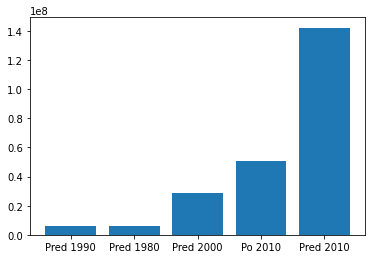

In [30]:
plt.bar(range(len(sorted_dict)), list(sorted_dict.values()), align='center')
plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

Tu zares opazimo razliko med števili. Močno prevladujejo knjige, ki so bile izdane med leti 2000 in 2010. Prišli smo do ugotovitve, da je popularnost knjig počasi naraščala do leta 2000, potem pa je med letoma 2000 in 2010 dosegla svoj maksimum. Po letu 2010 je začela popularnost knjig upadati. Temu lahko morda pripišemo razvoj različnih tehnologij, saj se danes knjige lahko bere tudi na tablici s pomočjo različnih aplikacij (npr. kindle,..), mnogo knjig je tudi v prostem dostopu na internetu, mogoče pa je knjige kupiti tudi v audio obliki, torej zvočnega posnetka besedila. 